In [44]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv,time,math

In [45]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [46]:
# File to load - clinical trial data
clinical_trial_data_to_load = "clinicaltrial_data.csv"
clinical_trial_data_to_load

'clinicaltrial_data.csv'

In [47]:
# File to Load - mouse drug data
mouse_drug_data_to_load = "mouse_drug_data.csv"
mouse_drug_data_to_load

'mouse_drug_data.csv'

In [48]:
# Read the clinical trial data and display data frame
clinical_data_df=pd.read_csv(clinical_trial_data_to_load)
clinical_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [49]:
# Read the mouse trial data and display data frame
mouse_data_df=pd.read_csv(mouse_drug_data_to_load)
mouse_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [50]:
# Combine the data into a single dataset
combined_data_df=pd.merge(mouse_data_df,clinical_data_df,on="Mouse ID")

# Display the merged data table for preview
combined_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [51]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol= combined_data_df.pivot_table(combined_data_df, index =['Drug','Timepoint'])
mean_tumor_vol.head()

Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000           45.000000
          5                  0.160000           44.266086
          10                 0.320000           43.084291
          15                 0.375000           42.064317
          20                 0.652174           40.716325

In [52]:
# Convert to DataFrame
# Preview DataFrame
mean_tumor_vol_df = pd.DataFrame(mean_tumor_vol.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())
mean_tumor_vol_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [53]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
mean_tumor_vol_df["Volume SEM"] = mean_tumor_vol_df['Tumor Volume (mm3)'].sem()
mean_tumor_vol_df.reset_index(inplace = True)
mean_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [54]:
# Minor Data Munging to Re-Format the Data Frames
revised_mean_tumor_vol_df = mean_tumor_vol_df.rename(columns={'Timepoint':'Timepoint (Days)','Tumor Volume (mm3)':'Tumor Vol. (mm^3)','Volume SEM':'Volume Std Error'})

# Preview that Reformatting worked
revised_mean_tumor_vol_df.head()

,Drug,Timepoint (Days),Tumor Vol. (mm^3),Volume Std Error
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [55]:
#Print list of drugs for reference
drug_list=revised_mean_tumor_vol_df['Drug'].unique().tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [56]:
#Generate pivot table of tumor volume by drug and timepoint; values in center are tumor volumes
tumor_vol_pivot=revised_mean_tumor_vol_df.pivot_table(index='Timepoint (Days)',columns='Drug',values='Tumor Vol. (mm^3)')
tumor_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint (Days),,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [57]:
#Generate pivot table of tumor volume standard errors by drug and timepoint
tumor_volerr_pivot=revised_mean_tumor_vol_df.pivot_table(index='Timepoint (Days)',columns='Drug',values='Volume Std Error')
tumor_volerr_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint (Days),,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


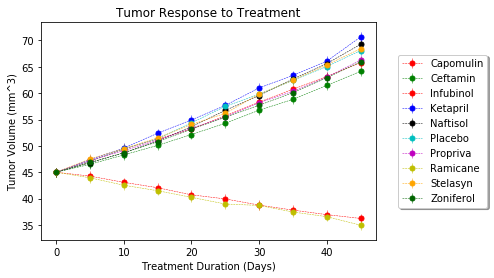

In [58]:
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Capomulin'], yerr=tumor_volerr_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Ceftamin'], yerr=tumor_volerr_pivot['Ceftamin'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Infubinol'], yerr=tumor_volerr_pivot['Infubinol'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Ketapril'], yerr=tumor_volerr_pivot['Ketapril'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Naftisol'], yerr=tumor_volerr_pivot['Naftisol'],
             color='k', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Placebo'], yerr=tumor_volerr_pivot['Placebo'],
             color='c', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Propriva'], yerr=tumor_volerr_pivot['Propriva'],
             color='m', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Ramicane'], yerr=tumor_volerr_pivot['Ramicane'],
             color='y', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Stelasyn'], yerr=tumor_volerr_pivot['Stelasyn'],
             color='orange', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumor_vol_pivot.index, tumor_vol_pivot['Zoniferol'], yerr=tumor_volerr_pivot['Zoniferol'],
             color='darkgreen', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.show()

In [59]:
plt.savefig('tumorresponse.png') 

## Metastatic Response to Treatment

In [60]:
meta_data_df=combined_data_df[['Drug','Timepoint','Metastatic Sites']]
meta_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2


In [61]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
meta_mean_df= pd.DataFrame(meta_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [62]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
meta_mean_df["Metastatic Site SEM"] = meta_mean_df['Metastatic Sites'].sem()
meta_mean_df.reset_index(inplace = True)
meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [63]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Preview that Reformatting worked
revised_meta_mean_df = meta_mean_df.rename(columns={'Timepoint':'Timepoint (Days)','Metastatic Site SEM':'Metastatic Std Error'})
revised_meta_mean_df.head()


,Drug,Timepoint (Days),Metastatic Sites,Metastatic Std Error
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [64]:
#Generate pivot table of tumor volume by drug and timepoint; values in center are metastatic si
meta_mean_pivot=revised_meta_mean_df.pivot_table(index='Timepoint (Days)',columns='Drug',values='Metastatic Sites')
meta_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint (Days),,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [65]:
#Generate pivot table of tumor volume by drug and timepoint; values in center are metastatic standard errors
meta_stderr_pivot=revised_meta_mean_df.pivot_table(index='Timepoint (Days)',columns='Drug',values='Metastatic Std Error')
meta_stderr_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint (Days),,,,,,,,,,
0,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
5,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
10,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
15,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
20,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
25,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
30,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
35,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
40,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044


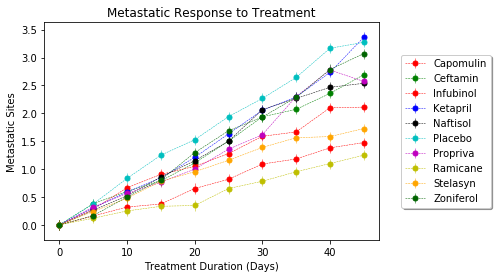

In [66]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Capomulin'], yerr=meta_stderr_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Ceftamin'], yerr=meta_stderr_pivot['Ceftamin'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Infubinol'], yerr=meta_stderr_pivot['Infubinol'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Ketapril'], yerr=meta_stderr_pivot['Ketapril'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Naftisol'], yerr=meta_stderr_pivot['Naftisol'],
             color='k', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Placebo'], yerr=meta_stderr_pivot['Placebo'],
             color='c', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Propriva'], yerr=meta_stderr_pivot['Propriva'],
             color='m', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Ramicane'], yerr=meta_stderr_pivot['Ramicane'],
             color='y', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Stelasyn'], yerr=meta_stderr_pivot['Stelasyn'],
             color='orange', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_mean_pivot.index, meta_mean_pivot['Zoniferol'], yerr=meta_stderr_pivot['Zoniferol'],
             color='darkgreen', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.title("Metastatic Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.show()

In [ ]:
plt.savefig('metastatic.png') 

## Survival Rates

In [67]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
survival_data_df= combined_data_df[['Drug','Timepoint','Mouse ID']]
survival_data_df.head()

,Drug,Timepoint,Mouse ID
0,Stelasyn,0,f234
1,Stelasyn,5,f234
2,Stelasyn,10,f234
3,Stelasyn,15,f234
4,Stelasyn,20,f234


In [68]:
#Print list of mouse IDs for reference
mouse_list=survival_data_df['Mouse ID'].unique().tolist()
mouse_list

['f234',
 'x402',
 'a492',
 'w540',
 'v764',
 'o848',
 'z314',
 'g989',
 'm269',
 'a963',
 't451',
 'p981',
 'k510',
 'h333',
 'c402',
 'j984',
 'w697',
 's619',
 'g867',
 'k862',
 'i901',
 'b879',
 'p387',
 'a366',
 's565',
 'j755',
 'e213',
 'e584',
 'e291',
 'z795',
 'x264',
 'v199',
 'r701',
 't724',
 'a818',
 'v295',
 'm133',
 'l725',
 'x336',
 'l700',
 'n304',
 'r604',
 'v835',
 'z969',
 'o725',
 'y601',
 'x930',
 'b559',
 'z234',
 'f993',
 'q119',
 'n923',
 'p189',
 'h246',
 'c819',
 'a457',
 'g107',
 'f932',
 'y260',
 'k382',
 'c580',
 'w422',
 'm550',
 'v289',
 'm650',
 'l264',
 'o331',
 'c832',
 'o973',
 'd474',
 'g497',
 'f278',
 'v603',
 'u327',
 'h428',
 'b128',
 'r944',
 's185',
 'w914',
 'l897',
 'b742',
 'f966',
 'u364',
 'j119',
 'l509',
 'm957',
 'g316',
 'r554',
 'g288',
 'y793',
 'i738',
 's710',
 'i557',
 'v923',
 'x401',
 'm601',
 'w150',
 't565',
 'r157',
 'j246',
 'q132',
 'i386',
 'a251',
 'z581',
 'o809',
 'k804',
 'k483',
 'y163',
 'a577',
 'v339',
 'c139',
 

In [69]:
#Data frame with timepoints and mouse IDs grouped by drug
survival_data_df = survival_data_df.set_index(['Drug','Timepoint'])
survival_data_df.head()

Mouse ID
Drug     Timepoint         
Stelasyn 0             f234
         5             f234
         10            f234
         15            f234
         20            f234

In [70]:
survival_data_df['Mouse Count'] = survival_data_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
survival_data_df.head()

Mouse ID  Mouse Count
Drug     Timepoint                      
Stelasyn 0             f234           26
         5             f234           25
         10            f234           23
         15            f234           23
         20            f234           21

In [71]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
revised_survival_data_df=survival_data_df.rename(columns={'Timepoint':'Timepoint','Mouse Count':'Number of Mice'})
revised_survival_data_df.head()

Mouse ID  Number of Mice
Drug     Timepoint                         
Stelasyn 0             f234              26
         5             f234              25
         10            f234              23
         15            f234              23
         20            f234              21

In [72]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
#Generate pivot table of mouse count by drug and timepoint; values in center are number of mice
survival_pivot=revised_survival_data_df.pivot_table(index='Timepoint',columns='Drug',values='Number of Mice')
survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [73]:
max_mice=survival_data_df['Mouse Count'].max()
max_mice

26

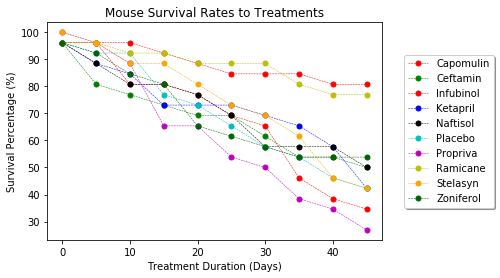

In [74]:
plt.errorbar(survival_pivot.index, survival_pivot['Capomulin']/max_mice*100, color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Ceftamin']/max_mice*100, color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Infubinol']/max_mice*100, color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Ketapril']/max_mice*100, color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Naftisol']/max_mice*100, color='k', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Placebo']/max_mice*100, color='c', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Propriva']/max_mice*100, color='m', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Ramicane']/max_mice*100, color='y', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Stelasyn']/max_mice*100, color='orange', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot.index, survival_pivot['Zoniferol']/max_mice*100, color='darkgreen', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.title("Mouse Survival Rates to Treatments")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Percentage (%)")
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.show()

In [81]:
plt.savefig('survival.png') 

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug
# Display the data to confirm
max_tumor_vol=revised_mean_tumor_vol_df['Tumor Vol. (mm^3)'].max()
max_tumor_vol

In [ ]:
#max_tumor_vol/

In [ ]:
tumor_pervolchange=revised_mean_tumor_vol_df['Tumor Vol. (mm3)']

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()